In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-retail-ecommerce-dataset/data.csv


# Inuebytes Major INTERNSHIP PROJECT (DATA SCIENCE)
# INDEX
# 1. Data Cleaning and Preprocessing
# 2. Exploratory Data Analysis (EDA)
# 3. Model Implementation and Evaluation
# 4. Customer Segmentation
# 5. Result and Insights
# 6. Question And Answers

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 1. Data Cleaning and Processsing

In [3]:
df_a = pd.read_csv("/kaggle/input/online-retail-ecommerce-dataset/data.csv", encoding='ISO-8859-1')

display(df_a.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df = pd.read_csv("/kaggle/input/online-retail-ecommerce-dataset/data.csv", encoding='ISO-8859-1')

display(df.head())

display(df.tail())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [5]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
df['revenue'] = df['UnitPrice']*df['Quantity']
df_a['TotalPrice'] = df['UnitPrice']*df['Quantity']

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


You will notice that each invoice is spread over several rows, one for each type of product purchased. These can be combined in such a way that the data for each transaction is in a single row. To do this, we can perform a grouped operation on InvoiceNo. However, before that, we need to specify how to combine those rows that are grouped. Use the following code:

In [8]:
operations = {'revenue':'sum',
              'InvoiceDate':'first',
              'CustomerID':'first' 
             }

df = df.groupby('InvoiceNo').agg(operations)

In [9]:
df.head()

,revenue,InvoiceDate,CustomerID
InvoiceNo,,,
536365,139.12,12/1/2010 8:26,17850.0
536366,22.20,12/1/2010 8:28,17850.0
536367,278.73,12/1/2010 8:34,13047.0
536368,70.05,12/1/2010 8:34,13047.0
536369,17.85,12/1/2010 8:35,13047.0


We first specify the aggregation functions we will use for each column, and then perform the grouping and apply those functions. InvoiceDate and CustomerID will be the same for all rows of the same invoice, so we can only take the first entry for them. For revenue, we sum the revenue for all items on the same invoice to get the total revenue for that invoice.

Since we will be using the year to decide which rows are being used for prediction and which ones we are predicting, create a separate column called year for the year, as follows:

In [10]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [11]:
df['year'] = df['InvoiceDate'].apply(lambda x: x.year)
df.head()

,revenue,InvoiceDate,CustomerID,year
InvoiceNo,,,,
536365,139.12,2010-12-01 08:26:00,17850.0,2010
536366,22.20,2010-12-01 08:28:00,17850.0,2010
536367,278.73,2010-12-01 08:34:00,13047.0,2010
536368,70.05,2010-12-01 08:34:00,13047.0,2010
536369,17.85,2010-12-01 08:35:00,13047.0,2010


In [12]:
df['days_since'] = (pd.datetime(year=2010, month=12, day=31) - 
                    df['InvoiceDate']).apply(lambda x: x.days)
df.head()

/tmp/ipykernel_20/2371654277.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df['days_since'] = (pd.datetime(year=2010, month=12, day=31) -


,revenue,InvoiceDate,CustomerID,year,days_since
InvoiceNo,,,,,
536365,139.12,2010-12-01 08:26:00,17850.0,2010,29
536366,22.20,2010-12-01 08:28:00,17850.0,2010,29
536367,278.73,2010-12-01 08:34:00,13047.0,2010,29
536368,70.05,2010-12-01 08:34:00,13047.0,2010,29
536369,17.85,2010-12-01 08:35:00,13047.0,2010,29


Currently, we have the data grouped by invoice, but we really want it to be grouped by customer.

We'll start by calculating all of our predictors. We will again define a set of aggregation functions for each of our variables and apply them using groupby. We will calculate the sum of the revenues.

For days_since, we will calculate the maximum and minimum number of days (giving us features that tell us how long this customer has been active in 2010, and how recently), as well as the number of unique values (giving us how many days apart this customer made a purchase). Since these are for our forecasters, we will only apply these functions to our data from 2010, and store them in a variable, X, and use the head function to see the results:

In [13]:
operations = {'revenue':'sum',
              'days_since':['max','min','nunique'],
             }

X = df[df['year'] == 2010].groupby('CustomerID').agg(operations)
df.head()

,revenue,InvoiceDate,CustomerID,year,days_since
InvoiceNo,,,,,
536365,139.12,2010-12-01 08:26:00,17850.0,2010,29
536366,22.20,2010-12-01 08:28:00,17850.0,2010,29
536367,278.73,2010-12-01 08:34:00,13047.0,2010,29
536368,70.05,2010-12-01 08:34:00,13047.0,2010,29
536369,17.85,2010-12-01 08:35:00,13047.0,2010,29


As you can see in the figure above, since we perform multiple types of aggregations on the days_since column, we end up with multi-level column labels. To simplify this, we can rescale the column names for easy reference later. Use the following code and print the results:

In [14]:
X.columns = [' '.join(col).strip() for col in X.columns.values]
X.head()

,revenue sum,days_since max,days_since min,days_since nunique
CustomerID,,,,
12347.0,711.79,23,23,1
12348.0,892.80,14,14,1
12370.0,1868.02,16,13,2
12377.0,1001.52,10,10,1
12383.0,600.72,8,8,1


Let's calculate one more characteristic: the average expense per order. We can calculate this by dividing the sum of the revenue by days_since_nunique (this is actually the average spend per day, not per order, but we are assuming that if two orders were placed on the same day, we can treat them as part of the same order for our purposes):

In [15]:
X['avg_order_cost'] = X['revenue sum']/X['days_since nunique']
X.head()

,revenue sum,days_since max,days_since min,days_since nunique,avg_order_cost
CustomerID,,,,,
12347.0,711.79,23,23,1,711.79
12348.0,892.80,14,14,1,892.80
12370.0,1868.02,16,13,2,934.01
12377.0,1001.52,10,10,1,1001.52
12383.0,600.72,8,8,1,600.72


Now that we have our forecasters, we need the result we will predict, which is just the sum of the revenues for 2011. We can calculate it with a simple groupby and store the values in the variable y, as follows:

In [16]:
y = df[df['year'] == 2011].groupby('CustomerID')['revenue'].sum()
y

CustomerID
12346.0       0.00
12347.0    3598.21
12348.0     904.44
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2094.88
18287.0    1837.28
Name: revenue, Length: 4244, dtype: float64

Now we can put our predictors and results into a single DataFrame, df_new, and rename the columns to have more intuitive names. Finally, look at the resulting DataFrame, using the head function:

In [17]:
df_new = pd.concat([X,y], axis=1)
df_new.columns = ['2010 revenue',
                       'days_since_first_purchase',
                       'days_since_last_purchase',
                       'number_of_purchases',
                       'avg_order_cost',
                       '2011 revenue']
df_new.head()

,2010 revenue,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,2011 revenue
CustomerID,,,,,,
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12370.0,1868.02,16.0,13.0,2.0,934.01,1677.67
12377.0,1001.52,10.0,10.0,1.0,1001.52,626.60
12383.0,600.72,8.0,8.0,1.0,600.72,1238.59


Note that many of the values in our DataFrame are NaN. This is caused by clients that were active only in 2010 or only in 2011, so there is no data for the other year. Later we will work on predicting which of our customers will churn, but for now, we will just drop all customers that are not active in both years. Note that this means that our model will predict customer spending in the next year assuming they are still active customers. To remove customers with no values, we will remove rows where any of the revenue columns are null, as follows:

In [18]:
df_new = df_new[~df_new['2010 revenue'].isnull()]
df_new = df_new[~df_new['2011 revenue'].isnull()]
df_new.head()

,2010 revenue,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,2011 revenue
CustomerID,,,,,,
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12370.0,1868.02,16.0,13.0,2.0,934.01,1677.67
12377.0,1001.52,10.0,10.0,1.0,1001.52,626.60
12383.0,600.72,8.0,8.0,1.0,600.72,1238.59


As a final data cleaning step, it is often a good idea to get rid of outliers. A standard definition is that an outlier is any data point that is more than three standard deviations above the median, so we will use this to remove clients that are outliers in terms of 2010 or 2011 revenue:

In [19]:
df_new = df_new[df_new['2011 revenue'] 
                          < ((df_new['2011 revenue'].median()) 
                             + df_new['2011 revenue'].std()*3)]

In [20]:
df_new = df_new[df_new['2010 revenue'] 
                          < ((df_new['2010 revenue'].median()) 
                             + df_new['2010 revenue'].std()*3)]

In [21]:
df_new.head()

,2010 revenue,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,2011 revenue
CustomerID,,,,,,
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12370.0,1868.02,16.0,13.0,2.0,934.01,1677.67
12377.0,1001.52,10.0,10.0,1.0,1001.52,626.60
12383.0,600.72,8.0,8.0,1.0,600.72,1238.59


### 2. Exploratory Data Analysis (EDA)

#### Examining the relationships between the predictors and the outcome.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


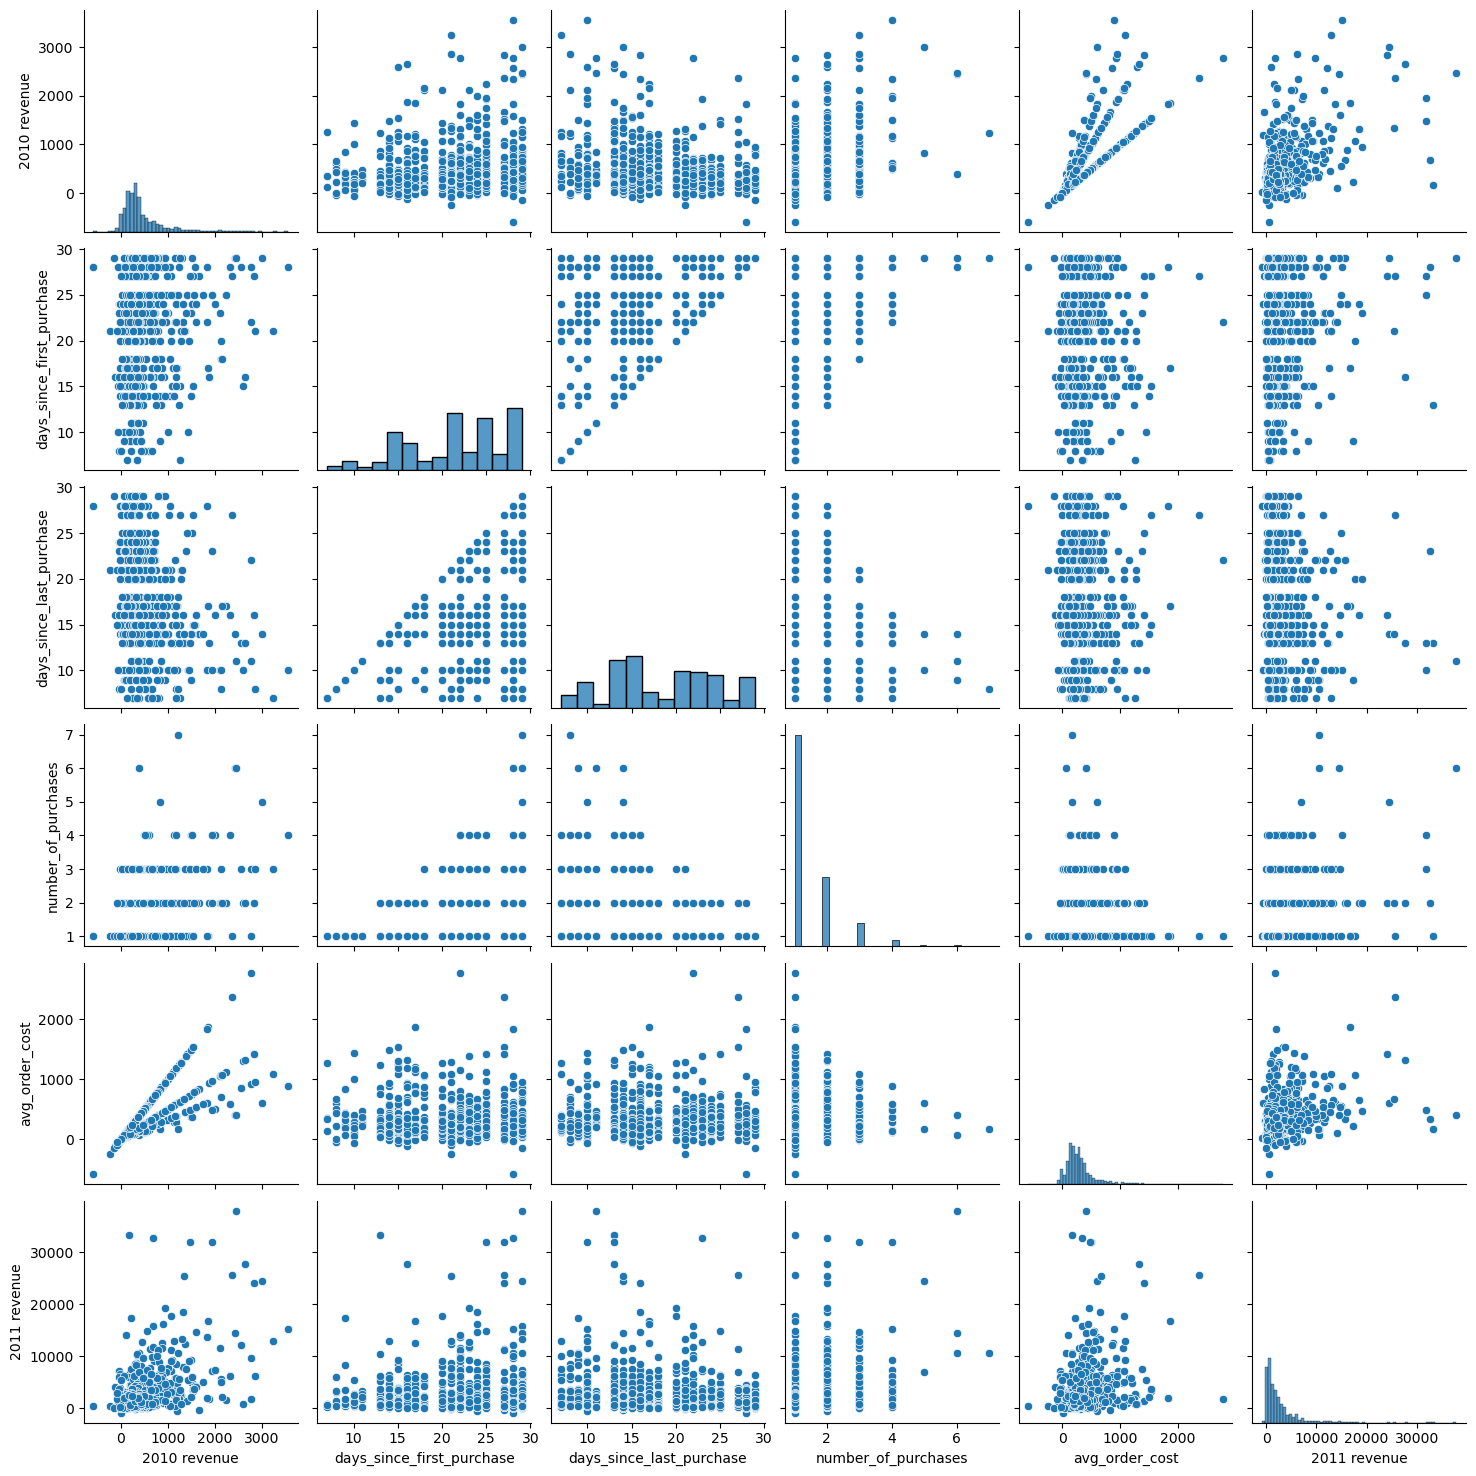

In [22]:
import seaborn as sns
%matplotlib inline

sns.pairplot(df_new)

In the diagram above, the diagonal shows a histogram for each variable, while each row shows the scatter plot between one variable and the other. The bottom row of figures shows the scatter plots of 2011 income (our outcome of interest) against each of the other variables. Because the data points overlap and there is a fair amount of variation, the relationships do not appear very clear in the visualizations.

Therefore, we can use correlations to help us interpret the relationships. The corr function of pandas will generate correlations between all the variables in a DataFrame:

In [23]:
df_new.corr()

,2010 revenue,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,2011 revenue
2010 revenue,1.000000,0.118418,-0.247773,0.467293,0.777996,0.546370
days_since_first_purchase,0.118418,1.000000,0.594933,0.321801,-0.055012,0.065237
days_since_last_purchase,-0.247773,0.594933,1.000000,-0.442660,-0.031861,-0.184807
number_of_purchases,0.467293,0.321801,-0.442660,1.000000,-0.031971,0.364517
avg_order_cost,0.777996,-0.055012,-0.031861,-0.031971,1.000000,0.334294
2011 revenue,0.546370,0.065237,-0.184807,0.364517,0.334294,1.000000


Again, we can look at the last row to see the relationships between our forecasters and the interest result (2011 revenue). Positive numbers indicate a positive relationship, e.g., the higher a client's 2010 income, the higher their expected income in 2011. Negative numbers mean the opposite, e.g., the more days since a customer's last purchase, the lower the revenue expectation for 2011. Also, the higher the absolute number, the stronger the relationship.

The resulting correlations should make sense. The more competitors in the area, the lower a location's revenue, while median income, loyalty members and population density are all positively related. The age of a place is also positively correlated with revenue, indicating that the longer a place is open, the better known it is and the more customers it attracts (or perhaps, only places that do well last a long time).

### 3.Model Building and Evaluation

#### Building a model that predicts customer spending.

We will build model on customer spending using the features created in the previous exercise:

Recall that there is only a weak relationship between days_since_first_purchase and 2011 revenue-so we will not include that predictor in our model.

Store the predictor columns and the outcome columns in the X and y variables, respectively:

In [24]:
X = df_new[['2010 revenue',
       'days_since_last_purchase',
       'number_of_purchases',
       'avg_order_cost'
       ]]

In [25]:
y = df_new['2011 revenue']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

#### Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [28]:
model1.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred1 = model1.predict(X_test)
r2_score(y_test, y_pred1)

0.31630788901535545

In [30]:
mean_absolute_error(y_test,y_pred1)

2257.3918642176145

In [31]:
mean_absolute_percentage_error(y_test, y_pred1)

5.665503553953292e+16

In [32]:
mean_squared_error(y_test, y_pred1)

19666525.892259356

#### RandomForestRegressor

In [33]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(random_state = 2529)

In [34]:
model2.fit(X_train, y_train)

RandomForestRegressor(random_state=2529)

In [35]:
y_pred2 = model2.predict(X_test)
r2_score(y_test, y_pred2)

0.20381684350043094

In [36]:
mean_absolute_error(y_test,y_pred2)

2514.9609849246235

In [37]:
mean_absolute_percentage_error(y_test, y_pred2)

6.881491857095173e+16

In [38]:
mean_squared_error(y_test, y_pred2)

22902350.94233994

### 4. Customer Segmentation

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

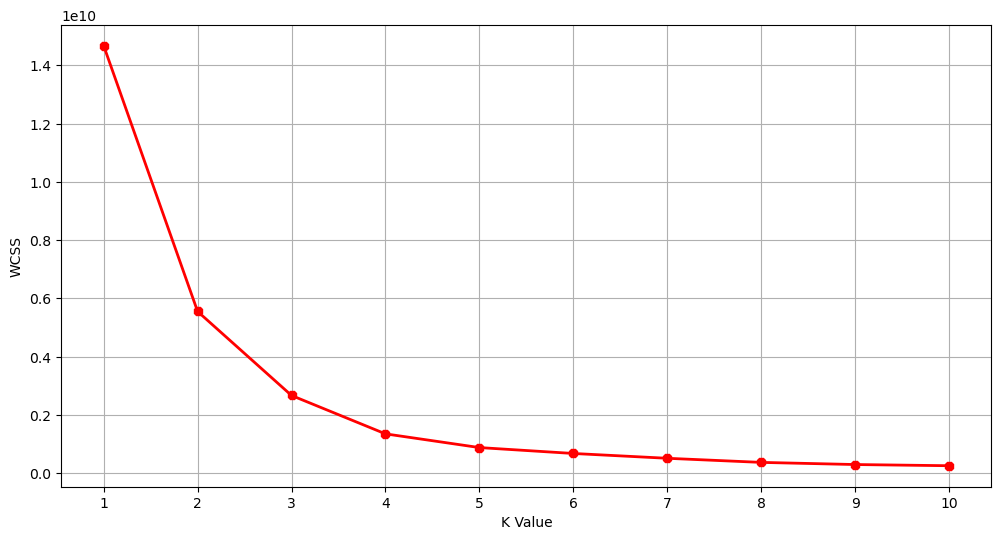

In [39]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df_new.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [40]:
km = KMeans(n_clusters=3)
clusters = km.fit_predict(df_new.iloc[:,1:])
df_new["label"] = clusters
from mpl_toolkits.mplot3d import Axes3D

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
df_new.dtypes

2010 revenue                 float64
days_since_first_purchase    float64
days_since_last_purchase     float64
number_of_purchases          float64
avg_order_cost               float64
2011 revenue                 float64
label                          int32
dtype: object

In [42]:
df_new.head()

,2010 revenue,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,2011 revenue,label
CustomerID,,,,,,,
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21,0
12348.0,892.80,14.0,14.0,1.0,892.80,904.44,0
12370.0,1868.02,16.0,13.0,2.0,934.01,1677.67,0
12377.0,1001.52,10.0,10.0,1.0,1001.52,626.60,0
12383.0,600.72,8.0,8.0,1.0,600.72,1238.59,0


In [43]:
df_new.columns

Index(['2010 revenue', 'days_since_first_purchase', 'days_since_last_purchase',
       'number_of_purchases', 'avg_order_cost', '2011 revenue', 'label'],
      dtype='object')

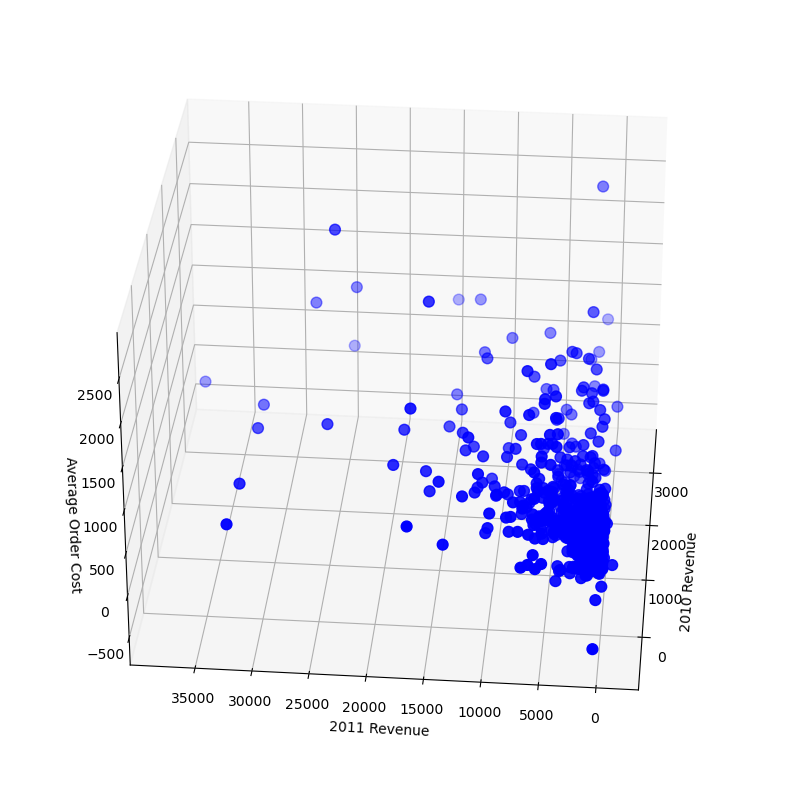

In [44]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_new["2010 revenue"][df_new.label == 0], df_new["2011 revenue"][df_new.label == 0], df_new["avg_order_cost"][df_new.label == 0], c='blue', s=60)
ax.scatter(df_new["2010 revenue"][df_new.label == 1], df_new["2011 revenue"][df_new.label == 1], df_new["avg_order_cost"][df_new.label == 1], c='blue', s=60)
ax.scatter(df_new["2010 revenue"][df_new.label == 2], df_new["2011 revenue"][df_new.label == 2], df_new["avg_order_cost"][df_new.label == 2], c='blue', s=60)
ax.scatter(df_new["2010 revenue"][df_new.label == 3], df_new["2011 revenue"][df_new.label == 3], df_new["avg_order_cost"][df_new.label == 3], c='blue', s=60)
ax.view_init(30, 185)
plt.xlabel("2010 Revenue")
plt.ylabel("2011 Revenue")
ax.set_zlabel('Average Order Cost')
plt.show()

Now we can use the fitted model to make predictions about a customer outside our data set.

Make a DataFrame containing a customer's data, where the 2010 revenue is 1,000, the number of days since last purchase is 20, the number of purchases is 2, and the average order cost is 500. Have the model make a prediction on this customer's data:

In [45]:
single_customer = pd.DataFrame({
    '2010 revenue': [1000],
    'days_since_last_purchase': [20],
    'number_of_purchases': [2],
    'avg_order_cost': [500]
})

In [46]:
single_customer

,2010 revenue,days_since_last_purchase,number_of_purchases,avg_order_cost
0,1000,20,2,500


In [47]:
model1.predict(single_customer)

array([4872.91796469])

In [48]:
model2.predict(single_customer)

array([5551.4718])

We can plot the model predictions in the test set against the actual value. First, we import matplotlib, and make a scatter plot of the model predictions in X_test against y_test.

Constrain the x and y axes to a maximum value of 10,000 so that we have a better view of where most of the data points are located.

Finally, add a line with slope 1, which will serve as our reference: if all points lie on this line, it means that we have a perfect relationship between our predictions and the true response:

/tmp/ipykernel_20/943511096.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 10000], [0, 10000], 'k-', color = 'r')


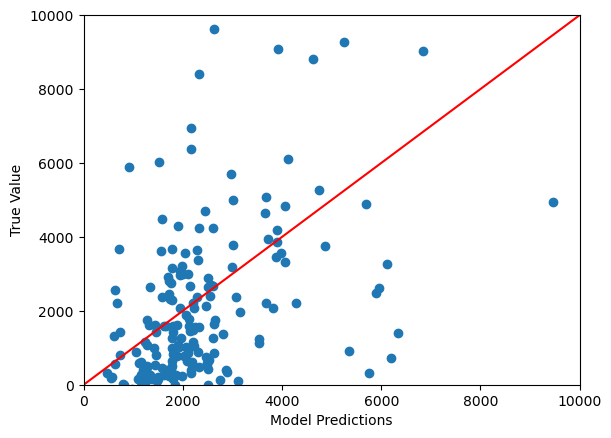

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(model1.predict(X_test),y_test)
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.plot([0, 10000], [0, 10000], 'k-', color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.show()

/tmp/ipykernel_20/395889307.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 10000], [0, 10000], 'k-', color = 'r')


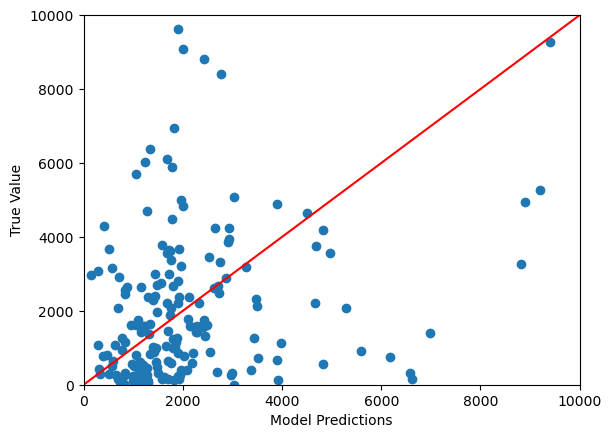

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(model2.predict(X_test),y_test)
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.plot([0, 10000], [0, 10000], 'k-', color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.show()

In the graph above, the red line indicates where the points would be if the prediction were the same as the actual value. Since many of our points are quite far from the red line, this indicates that the model is not completely accurate. However, there does appear to be some relationship, as higher model predictions have higher true values.

To further examine the relationship, we can use correlation. From scipy, we can import the pearsonr function, which calculates the correlation between two matrices, just as we did with Pandas for our entire DataFrame. We can use it to calculate the correlation between our model predictions and the actual value as follows:

In [51]:
from scipy.stats.stats import pearsonr
pearsonr(model1.predict(X_test),y_test)

(0.6165789033773585, 3.159076303926745e-22)

Two numbers returned: (0.612574007666680493, 1.934002067463782e-20). The first number is the correlation, which is close to 0.6, indicating a strong relationship. The second number is the p-value, which indicates the probability of seeing such a strong relationship if the two sets of numbers were unrelated; the very low number here means that this relationship is unlikely to be due to chance.

### 5. Result and Insights

#### Gross Merchandise Value

In [52]:
df_a['InvoiceDate'] = pd.to_datetime(df_a['InvoiceDate'])

df_a['DayCode'] = df_a['InvoiceDate'].dt.dayofweek
df_a['DateYMD'] = df_a["InvoiceDate"].dt.date
df_a['DateYM'] = df_a['InvoiceDate'].dt.to_period('M')
df_a['Day'] = df_a['InvoiceDate'].dt.day_name()
df_a['TotalPrice']= df_a['Quantity'] * df_a['UnitPrice']
df.dtypes

revenue               float64
InvoiceDate    datetime64[ns]
CustomerID            float64
year                    int64
days_since              int64
dtype: object

<Axes: xlabel='DateYM'>

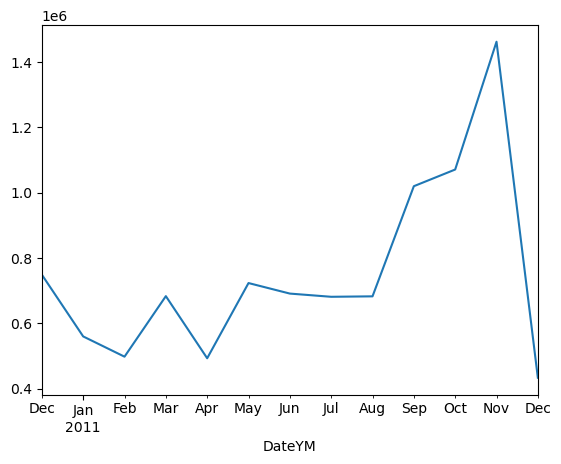

In [53]:
df_a.groupby('DateYM')['TotalPrice'].sum().plot()

Key Highlights:

1. Fluctuation in Gross Merchandise Value (GMV) observed from December 2010 to July 2011.
2. GMV shows an upward trend from August 2011 to October 2011, reaching its peak in November 2011.
3. A significant decline in GMV is observed in December 2011, indicating a sharp drop in sales or transaction volume during that period.

GMV Top 10 Country Based On Transaction Value

In [54]:
top10_gmvcountry = df_a.groupby("Country")['TotalPrice'].sum().sort_values(ascending=False).head(10).reset_index()
top10_gmvcountry

,Country,TotalPrice
0,United Kingdom,8187806.364
1,Netherlands,284661.540
2,EIRE,263276.820
3,Germany,221698.210
4,France,197403.900
5,Australia,137077.270
6,Switzerland,56385.350
7,Spain,54774.580
8,Belgium,40910.960
9,Sweden,36595.910


Text(0, 0.5, 'Transaction Value')

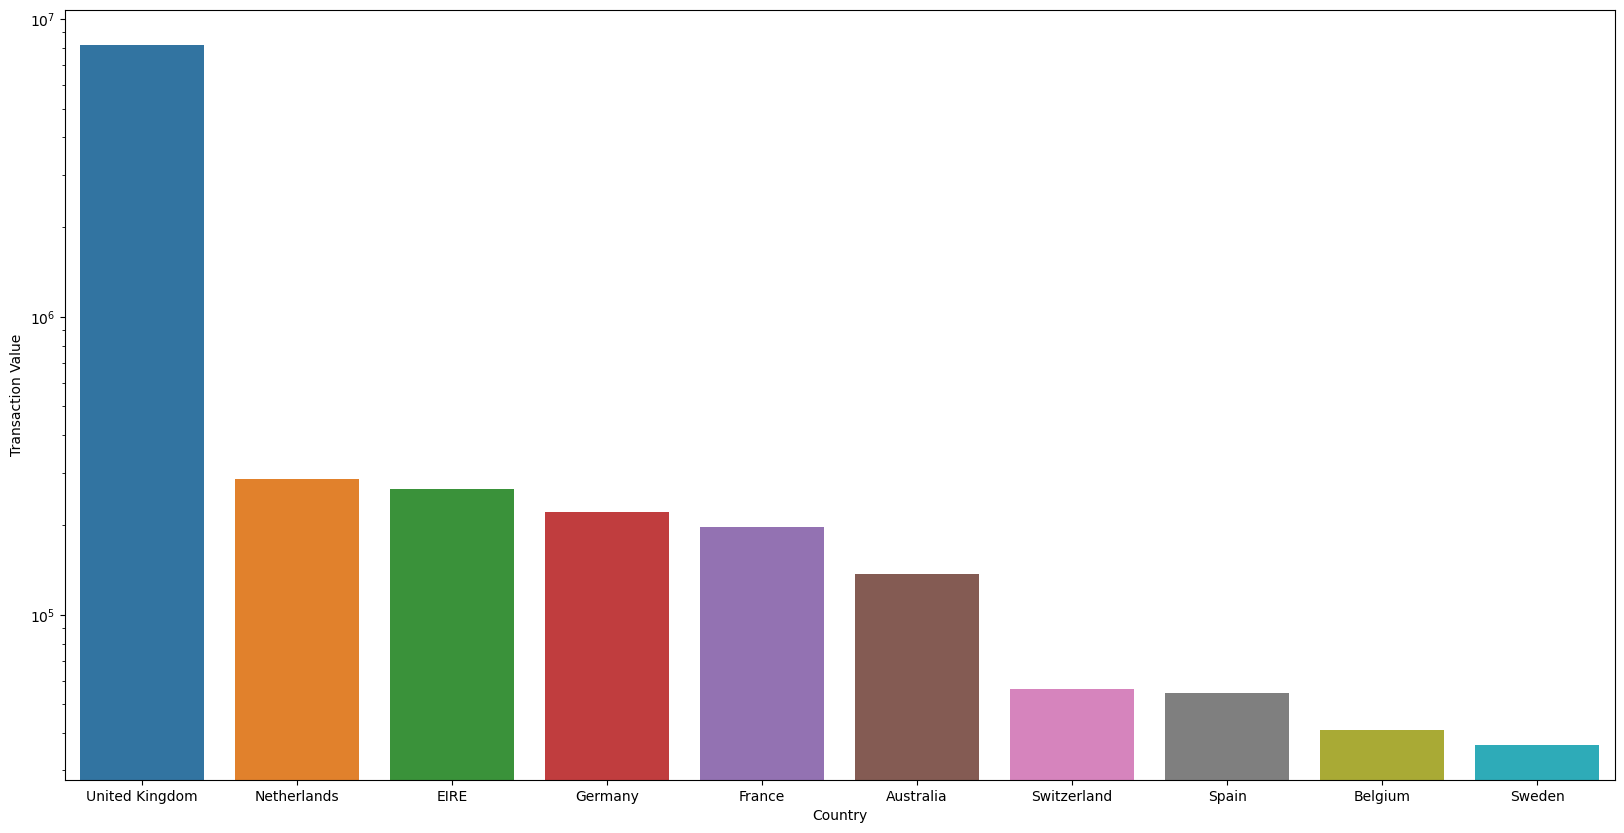

In [55]:
ax = sns.barplot(data=top10_gmvcountry, x="Country", y="TotalPrice")
plt.yscale("log")
ax.figure.set_size_inches(20,10)
ax.set_ylabel("Transaction Value")

GMV Top 5 Products Based On Transaction Value

In [56]:
top5_producstgmv = df_a.groupby("Description").agg({"TotalPrice": "sum"}) \
                    .sort_values(by="TotalPrice", ascending=False).head(5) \
                    .reset_index() \
                    .rename(columns={"TotalPrice": "TransactionValue", "Description":"Products"}) 
top5_producstgmv

,Products,TransactionValue
0,DOTCOM POSTAGE,206245.48
1,REGENCY CAKESTAND 3 TIER,164762.19
2,WHITE HANGING HEART T-LIGHT HOLDER,99668.47
3,PARTY BUNTING,98302.98
4,JUMBO BAG RED RETROSPOT,92356.03


<Axes: xlabel='TransactionValue', ylabel='Products'>

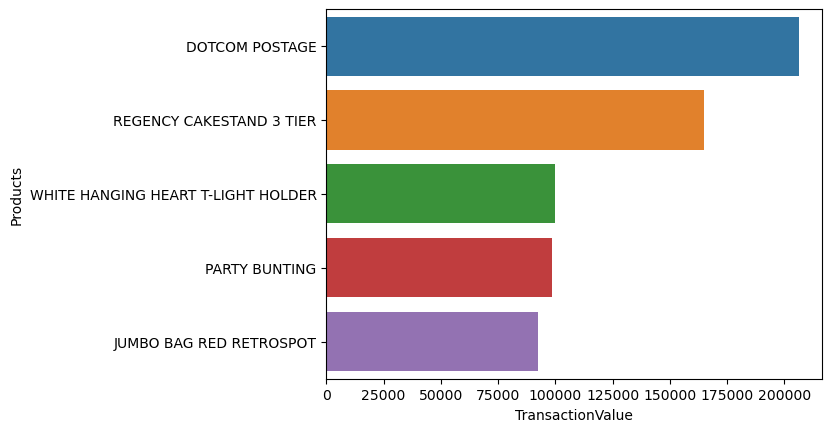

In [57]:
sns.barplot(data=top5_producstgmv, x="TransactionValue", y="Products")

The Favorite Day for Shopping

In [58]:
df_by_day = df_a.groupby(["Day", "DayCode"]).agg({"TotalPrice": "sum", "InvoiceNo":"count"}) \
            .reset_index() \
            .sort_values(by="DayCode") \
            .rename(columns = {"TotalPrice":"ValueTransaction", "InvoiceNo":"NumberOfOrders"})
df_by_day

,Day,DayCode,ValueTransaction,NumberOfOrders
1,Monday,0,1588609.431,95111
4,Tuesday,1,1966182.791,101808
5,Wednesday,2,1734147.010,94565
3,Thursday,3,2112519.000,103857
0,Friday,4,1540610.811,82193
2,Sunday,6,805678.891,64375


Transaction Value group by Day

<Axes: xlabel='Day', ylabel='ValueTransaction'>

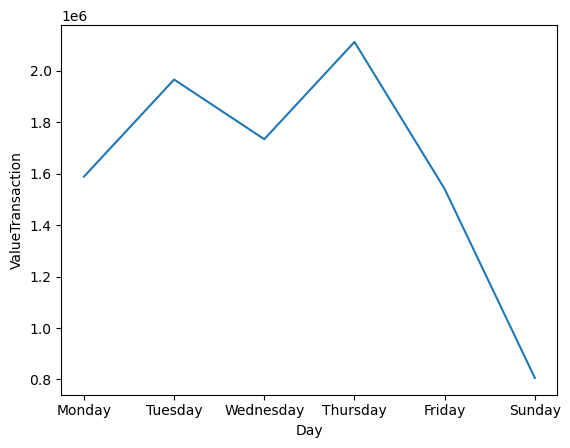

In [59]:
sns.lineplot(data=df_by_day, x="Day", y="ValueTransaction")

Number of orders group by Day

<Axes: xlabel='Day', ylabel='NumberOfOrders'>

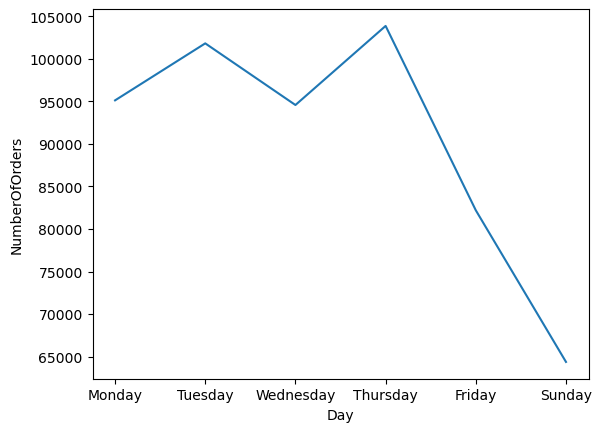

In [60]:
sns.lineplot(data=df_by_day, x="Day", y="NumberOfOrders")

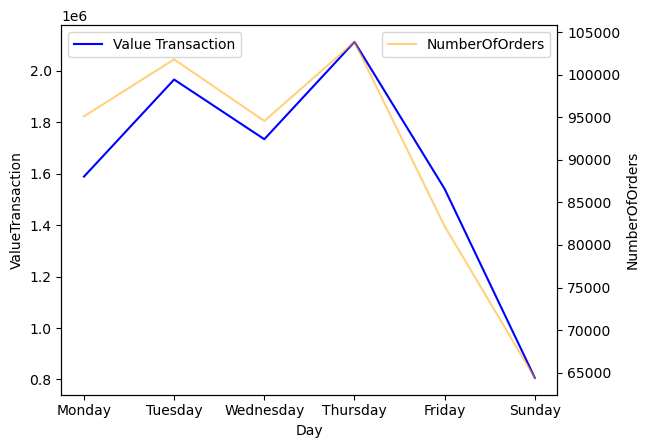

In [61]:
# plot line graph on axis #1
ax1 = sns.lineplot(data=df_by_day, x="Day", y="ValueTransaction" ,color='blue')
ax1.legend(['Value Transaction'], loc="upper left")
ax2 = ax1.twinx()
# plot bar graph on axis #2
sns.lineplot(data=df_by_day, x="Day", y="NumberOfOrders", color='orange', alpha=0.5, ax = ax2)
ax2.legend(['NumberOfOrders'], loc="upper right")
plt.show()

### Question And Answers

**Question-1.** What kind of business model of the e commerce platform your working with ?

**Answer -** To predict Annual Spending of customers on their behaviour and to increase the effective marketing and personalized user experience.

**Question-2.** What kind of data preprocessing and cleaning was required for the Online Retail Dataset ? 

**Answer -** Remove NA Values, Grouping the data, Merging data sets and Removing outliers ( any data point that is more than three standard deviations above the median )

**Question-3.** How did you visualize and interpret the data distributions and relationship using Power BI/Tableau ?

**Answer -** Gross Merchandise Value (GMV) , Top 10 Country based on transcation value, Top 5 Product, The Favorite Day for Shopping, Transaction Value group by Day, No. of order group by Day.

**Question-4.** What new features did you engineer from the existing dataset and why ?

**Answer -** Added Revenue column, extraxted year and days since the last date of the year ( i.e 31 Dec ) from InvoiceDate

**Question-5.** Which regression model did you test for predicting the anual spending of a customer ?

**Answer -** I used Linear Regression Model to predict anual spending of a customer

**Question-6.** What  metrics did you use to evaluate the performance of the predictive model ?

**Answer -** I used  Mean Absolute Error, Mean Absolute Percentage Error, Mean Squared Error, r2 score.

**Question-7.** How did you apply clustering techniques for customer segmentation? What were the results ?

**Answer -** For clusering I used K-Means and to determining the number of clusters in a data set I used Elbow Method.

**Question-8.** How would you interpret the result obtained from the model in a business context ?

 **Answer -** 
1. Fluctuation in Gross Merchandise Value (GMV) observed from December 2010 to July 2011. GMV shows an upward trend from August 2011 to October 2011, reaching its peak in November 2011. A significant decline in GMV is observed in December 2011, indicating a sharp drop in sales or transaction volume during that period.
2. United Kingdom is No.1 in GMV in the world.
3. DOTCOM POSTAGE and REGENCY CAKESTAND 3 TIER is the highest selling product.
4. Favourite day of shopping is Thursday resulting in the highest Revenue among other days


**Question-9.** How can the insights derived from this project be beneficial for the e-commerece platform's business strategy ?

**Answer -** The insights derived from this project can help company to under which day is the best to advertise new products, which country has the highest transcation so they might release new scheme in those places and if its sucessful then expand it to other countries, which new products might sell better.

**Question-10.** What did you learn about the data science project lifecycle throughout this project ?

**Answer -** I leaned Data Extraction, Cleansing, EDA, Modeling, Evaluation, Clustering, Result and Insight finding also the use of machine learning algorithms and statistical practices that result in better prediction models